# A form of PR in the UK

I do not know much about polotics, what i do know is that many people do not think that the current votising system that the uk usees represents the wants of the country fairly. in the past, some partys have gained a good share of the votes however not recieved many seats in parliment. This is because the UK uses a system called first past the post. This means that the party with the most votes in a consituency wins the seat.

What i am proposing is a form of proportioal representation. I am approching this problem niively at the begining as to not scew my "general public fairness" view. I will then compare what i have come up with to other systems of PR to see if it is better or worse.

the main requirements for this system are:
- it must appear fair
- it must be simple to understand
- it must be simple to implement
- the party with the most votes should have the most seats
- there should be a case where a coalition is needed to form a government
- smaller partys should be able to gain seats if they have a good share of the votes
- constituatncies should still be fairly represented

proposed process for the new system:
1. automatic seat gain at 40% of the vote in a constituency
2. calculate total vote share for each party
3. if the total vote share is more than 40% for a party, they win goverent and get at least 50% of the seats
4. if no party has more than 40% of the vote, all seats are alocated with the next steps and a coelition is formed
5. calculate the number of seats each party should have based on the total vote share
6. allocate the remaining seats to the party with the highest vote share

*(40% is a placeholder value. this value should be chosed based on historical results to ensure that PR is achieved)*



In [47]:
#variables
automatic_seat = 0.5
party_win_vote_share = 0.4

In [48]:
#improt libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
import json

## The current system

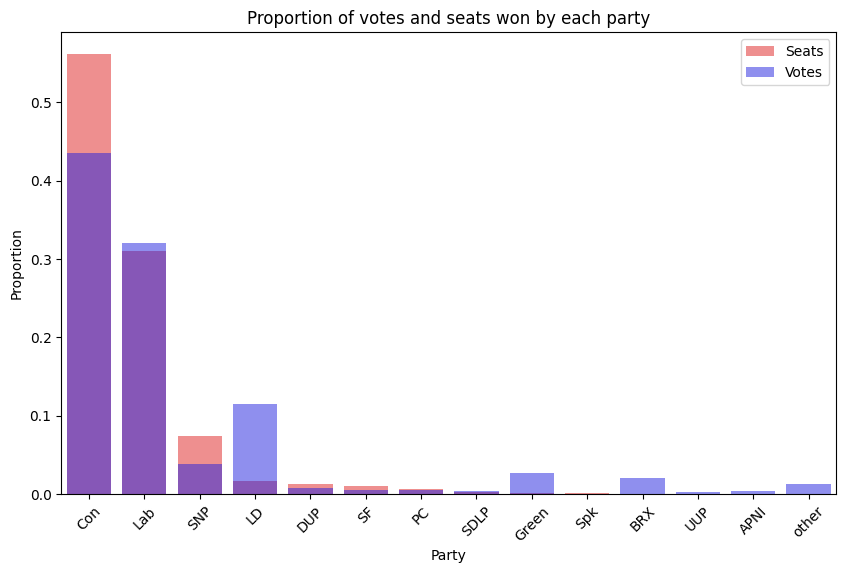

In [49]:
data = pd.read_csv(open('data.csv'))
# print(data.head())

#number of seats won by each party
party_seats = data['First party'].value_counts().reset_index() 
party_seats['proportion'] = party_seats['count'] / party_seats['count'].sum()
# print(party_seats)
# from IPython.display import display, Markdown
# display(Markdown(party_seats.to_markdown()))


parties = ['Con','Lab','LD','BRX','Green','SNP','PC','DUP','SF','SDLP','UUP','APNI','other','Of which other winner']
vote_sums = []

# Calculate the sum of votes for each party and append to the list
for party in parties:
    sum_votes = data[party].sum()
    vote_sums.append(sum_votes)

# Create a new DataFrame with 'party' and 'votes' columns
party_votes = pd.DataFrame({
    'party': parties,
    'votes': vote_sums
})

# Display the newly created DataFrame
party_votes['proportion'] = party_votes['votes'] / party_votes['votes'].sum()
# print(party_votes)

#bar chart with the propotions of each df
plt.figure(figsize=(10, 6))
sns.barplot(x='First party', y='proportion', data=party_seats[:-1],
            color='red', alpha=0.5, label='Seats')
sns.barplot(x='party', y='proportion', data=party_votes[:-1], 
            color='blue', alpha=0.5, label='Votes')


plt.title('Proportion of votes and seats won by each party')
plt.ylabel('Proportion')
plt.xlabel('Party')
plt.xticks(rotation=45)
plt.legend()

#save the plot
plt.savefig('graphs/votes_vs_seats_fpp.png')

# plt.close()


this graph shows that conservatives gained more seats than the vote share would suggest. also liberal democrats gained less seats than the vote share would suggest. this is because the conservatives won many seats with a small majority. 

<!-- ![current system votes v seats](graphs/votes_vs_seats_fpp.png) -->

<!-- <img src="graphs\votes_vs_seats_fpp.png" alt="current system votes v seats" > -->

# Proposed PR system

1. automatic seat gain at 50% of the vote in a constituency

In [50]:
new_seats = []
# print(len(data))

data['won by'] = None
# Assuming 'data' is a pandas DataFrame and 'parties' is a list of column names representing parties
for index, row in data.iterrows():
    sum_votes =0
    win = None
    num = 0
    for party in parties:
        # Access the vote count for the current party in the current row
        vote_count = row[party]
        sum_votes += vote_count
        # Example logic to determine the winner for the current row
        if vote_count > num:
            num = vote_count
            win = party

    if num/sum_votes > automatic_seat:
        # Assuming you want to store the winning party for each row
        new_seats.append(win)
        data.at[index, 'won by'] = win

# print(len(data))

#bar chart of the new seats
new_seats =  pd.DataFrame(new_seats, columns=['seats'])
new_seats = new_seats.value_counts().reset_index()
# new_seats
new_seats['proportion'] = new_seats['count'] / new_seats['count'].sum()

print(new_seats)
plt.figure(figsize=(10, 6))
sns.barplot(x='seats', y='proportion', data=new_seats, 
            color='red', alpha=0.5, label='new seats')
sns.barplot(x='party', y='proportion', data=party_votes[:-1], 
            color='blue', alpha=0.5, label='Votes')

plt.title('Proportion of votes and seats won by each party')
plt.ylabel('Proportion')
plt.xlabel('Party')
plt.xticks(rotation=45)
plt.legend()

#save the plot
plt.savefig('graphs/votes_vs_seats_pr_step1.png')

plt.close()

# print(new_seats.to_markdown())
# print(data.info())

# print(data['won by'].dropna().head())
# print(new_seats['count'].sum())


   seats  count  proportion
0    Con    280    0.665083
1    Lab    120    0.285036
2    SNP     10    0.023753
3     LD      6    0.014252
4   SDLP      2    0.004751
5  Green      1    0.002375
6     SF      1    0.002375
7  other      1    0.002375


2. calculate total vote share for each party
3. calculate the number of seats each party should have based on the total vote share


In [51]:
#total votes proportion
party_votes = party_votes.sort_values(by='votes', ascending=False)

#add new_seats "count" to the party_votes
party_votes['seats won'] = new_seats['count']
#replace nan with 0
party_votes['seats won'] = party_votes['seats won'].fillna(0)

party_votes['extra seats'] = (650 - party_votes['seats won'].sum()) * party_votes['proportion']

party_votes['total seats'] = round(party_votes['seats won'] + party_votes['extra seats'])

party_votes['seat proportion'] = party_votes['total seats'] / party_votes['total seats'].sum()

#order party_votes by seat proportion
party_votes = party_votes.sort_values(by='seat proportion', ascending=False)

print(party_votes['total seats'].sum())


party_votes

650.0


,party,votes,proportion,seats won,extra seats,total seats,seat proportion
0,Con,13966454,0.435894,280.0,99.819726,380.0,0.584615
1,Lab,10269051,0.320498,120.0,73.393995,193.0,0.296923
2,LD,3696419,0.115365,10.0,26.418698,36.0,0.055385
3,BRX,644257,0.020107,6.0,4.604573,11.0,0.016923
5,SNP,1242380,0.038775,1.0,8.879421,10.0,0.015385
4,Green,865715,0.027019,2.0,6.187357,8.0,0.012308
12,other,404613,0.012628,0.0,2.891812,3.0,0.004615
7,DUP,244128,0.007619,1.0,1.744809,3.0,0.004615
6,PC,153265,0.004783,1.0,1.095401,2.0,0.003077
8,SF,181853,0.005676,0.0,1.299723,1.0,0.001538


In [52]:
plt.figure(figsize=(10, 6))
sns.barplot(x='party', y='seat proportion', data=party_votes, 
            color='red', alpha=0.5, label='new seats')
sns.barplot(x='party', y='proportion', data=party_votes[:-1], 
            color='blue', alpha=0.5, label='Votes')

plt.title('Proportion of votes and seats won by each party')
plt.ylabel('Proportion')
plt.xlabel('Party')
plt.xticks(rotation=45)
plt.legend()

#save the plot
plt.savefig('graphs/votes_vs_seats_pr_step2.png')

plt.close()

In [57]:
print(party_votes[['party' ,'total seats', 'seat proportion']].to_markdown())   

|    | party                 |   total seats |   seat proportion |
|---:|:----------------------|--------------:|------------------:|
|  0 | Con                   |           380 |        0.584615   |
|  1 | Lab                   |           193 |        0.296923   |
|  2 | LD                    |            36 |        0.0553846  |
|  3 | BRX                   |            11 |        0.0169231  |
|  5 | SNP                   |            10 |        0.0153846  |
|  4 | Green                 |             8 |        0.0123077  |
| 12 | other                 |             3 |        0.00461538 |
|  7 | DUP                   |             3 |        0.00461538 |
|  6 | PC                    |             2 |        0.00307692 |
|  8 | SF                    |             1 |        0.00153846 |
| 11 | APNI                  |             1 |        0.00153846 |
|  9 | SDLP                  |             1 |        0.00153846 |
| 10 | UUP                   |             1 |        0.001538

In [63]:
#comparing the results with the actual results
plt.figure(figsize=(10, 6))
sns.barplot(x='party', y='total seats', data=party_votes[:-1], 
            color='red', alpha=0.5, label='PR')
sns.barplot(x='First party', y='count', data=party_seats[:-1],
            color='blue', alpha=0.5, label='FPP')


plt.title('Proportion of votes and seats won by each party')
plt.ylabel('Seats')
plt.xlabel('Party')
plt.xticks(rotation=45)
plt.legend()

#save the plot
plt.savefig('graphs/votes_vs_seats_pr_v_fpp.png')

plt.close()

### 4. allocate the remaining seats to the party with the highest vote share in each constituency